In [1]:
import requests
import pandas as pd
import folium
import numpy as np

Get Food category data near Yogyakarta

In [2]:
CLIENT_ID = 'LECVYRJQ0XDGMA5LXTBFBNNSMHPOOYWR150ZAGMRQPNH1FXH'
CLIENT_SECRET = 'JT512JORVL1MW45EMIQD24GWFPCGI1IKXS4RTB3VY1RZQVSF'
LIMIT = 50
VERSION = '20200117'
CATEGORY='4d4b7105d754a06374d81259'
region_list = ['Yogyakarta']

In [56]:

final_food_stall = pd.DataFrame()
for near in region_list:    
    url = 'https://api.foursquare.com/v2/venues/search?&categoryId={}&client_id={}&client_secret={}&near={}&limit={}&v={}'.format(
        CATEGORY,
        CLIENT_ID, 
        CLIENT_SECRET, 
        near,
        LIMIT,
        VERSION)
    results = requests.get(url).json()
    
    for venue in results['response']['venues']:
        food_stall_to_append = pd.DataFrame()
        food_stall_to_append['name'] = [venue['name']]
        food_stall_to_append['id'] = [venue['id']]
        food_stall_to_append['lat'] = [venue['location']['lat']]
        food_stall_to_append['lng'] = [venue['location']['lng']]
        
        final_food_stall = final_food_stall.append(food_stall_to_append)
final_food_stall = final_food_stall.reset_index(drop=True)
final_food_stall.to_csv('food_stalls.csv', index=False)


Cluster

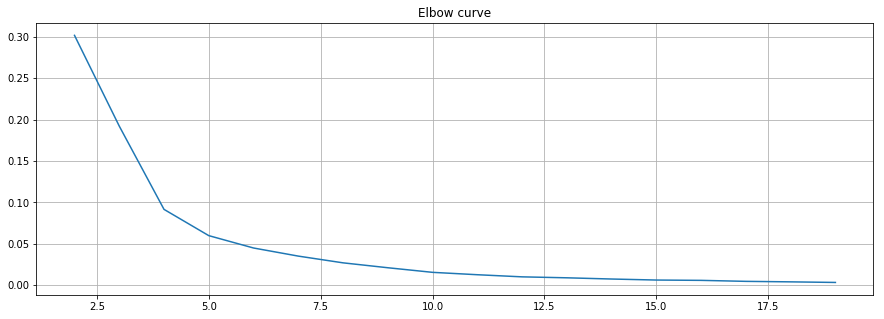

In [57]:
X = final_food_stall[['lat', 'lng']]
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [58]:
k=5
kmeans = KMeans(n_clusters = k,random_state=0).fit(X)
final_dataset = pd.DataFrame()
final_dataset['cluster'] = kmeans.labels_
len(final_dataset)
final_dataset = pd.concat([final_dataset, final_food_stall], axis = 1)
final_dataset

,cluster,name,id,lat,lng
0,1,Toko Roti Trubus,4c045fe8187ec9280e07b77b,-7.782053,110.361704
1,1,Bakmi Jawa Pak Roto,5eba3f9f7dcb100007f0124e,-7.849712,110.374245
2,3,"Breakfast Lounge, Jogjakarta Plaza Hotel",4d9e6e099b91a1cd5aa656c0,-7.768633,110.392853
3,1,Pasar Kranggan,4bc47196abf49521c600c593,-7.777735,110.369567
4,1,McDonald's,4baccfaff964a520330e3be3,-7.783198,110.371719
5,3,Sushi Tei,5233fb3b11d2d8b37d40ea3d,-7.778814,110.388627
6,3,McDonald's,5107a0ffe0e2a19ee3141596,-7.748749,110.361856
7,3,Burjo Andeska 05,4c4c80e3959220a1bdb72011,-7.770122,110.409775
8,1,Sate Kambing Pak Wawi 3,5eb97a2561cb2d0007d004c4,-7.870358,110.390409
9,1,Bakmi Jawa Handayani (Pak Ndut),5eb7dd9e8ad5dd00087d9989,-7.837125,110.374340


Show map

In [59]:
mean_lat = final_dataset['lat'].mean()
mean_lng = final_dataset['lng'].mean()


In [60]:
map_clusters = folium.Map(location=[mean_lat,mean_lng],zoom_start=10)


markers_colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black'
]
for lat, lon, cluster in zip(final_dataset['lat'], final_dataset['lng'],  final_dataset['cluster']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=markers_colors[cluster],
        fill=True,
        fill_color=markers_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
    
       
map_clusters

# Remove Outlier
If we see the map, we can see there is outlier. Some food stalls or restaurant so fat way from city of Yogyakarta. In this project we will exclude the

In [61]:
two_biggest_cluster = final_dataset.groupby('cluster').count().sort_values('name').reset_index().iloc[-2:, [0]] 
two_biggest_cluster

,cluster
3,3
4,1


In [64]:
filteret_dataset = final_dataset[final_dataset['cluster'].isin(two_biggest_cluster['cluster'])].reset_index(drop=True)

In [65]:
filteret_dataset


,cluster,name,id,lat,lng
0,1,Toko Roti Trubus,4c045fe8187ec9280e07b77b,-7.782053,110.361704
1,1,Bakmi Jawa Pak Roto,5eba3f9f7dcb100007f0124e,-7.849712,110.374245
2,3,"Breakfast Lounge, Jogjakarta Plaza Hotel",4d9e6e099b91a1cd5aa656c0,-7.768633,110.392853
3,1,Pasar Kranggan,4bc47196abf49521c600c593,-7.777735,110.369567
4,1,McDonald's,4baccfaff964a520330e3be3,-7.783198,110.371719
5,3,Sushi Tei,5233fb3b11d2d8b37d40ea3d,-7.778814,110.388627
6,3,McDonald's,5107a0ffe0e2a19ee3141596,-7.748749,110.361856
7,3,Burjo Andeska 05,4c4c80e3959220a1bdb72011,-7.770122,110.409775
8,1,Sate Kambing Pak Wawi 3,5eb97a2561cb2d0007d004c4,-7.870358,110.390409
9,1,Bakmi Jawa Handayani (Pak Ndut),5eb7dd9e8ad5dd00087d9989,-7.837125,110.374340


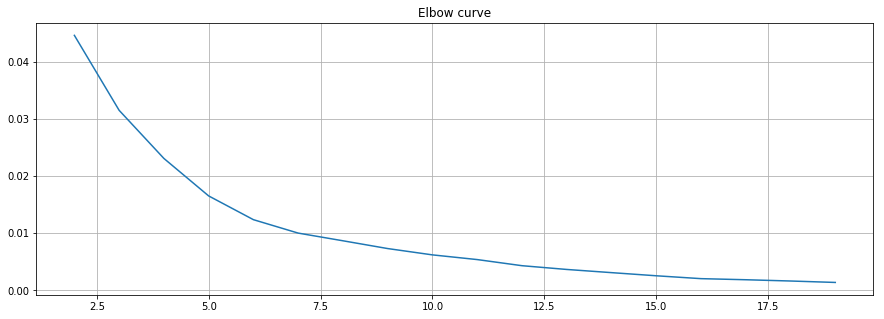

In [66]:
X = filteret_dataset[['lat', 'lng']]

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [67]:
k=6
kmeans = KMeans(n_clusters = k,random_state=0).fit(X)
final_filtered_dataset = pd.DataFrame()
final_filtered_dataset['cluster'] = kmeans.labels_

final_filtered_dataset = pd.concat([final_filtered_dataset, filteret_dataset.drop('cluster', axis=1)], axis = 1)
final_filtered_dataset

,cluster,name,id,lat,lng
0,0,Toko Roti Trubus,4c045fe8187ec9280e07b77b,-7.782053,110.361704
1,5,Bakmi Jawa Pak Roto,5eba3f9f7dcb100007f0124e,-7.849712,110.374245
2,3,"Breakfast Lounge, Jogjakarta Plaza Hotel",4d9e6e099b91a1cd5aa656c0,-7.768633,110.392853
3,0,Pasar Kranggan,4bc47196abf49521c600c593,-7.777735,110.369567
4,0,McDonald's,4baccfaff964a520330e3be3,-7.783198,110.371719
5,3,Sushi Tei,5233fb3b11d2d8b37d40ea3d,-7.778814,110.388627
6,2,McDonald's,5107a0ffe0e2a19ee3141596,-7.748749,110.361856
7,3,Burjo Andeska 05,4c4c80e3959220a1bdb72011,-7.770122,110.409775
8,5,Sate Kambing Pak Wawi 3,5eb97a2561cb2d0007d004c4,-7.870358,110.390409
9,5,Bakmi Jawa Handayani (Pak Ndut),5eb7dd9e8ad5dd00087d9989,-7.837125,110.374340


In [68]:
map_clusters = folium.Map(location=[mean_lat,mean_lng],zoom_start=10)


markers_colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black'
]
for lat, lon, cluster in zip(final_filtered_dataset['lat'], final_filtered_dataset['lng'],  final_filtered_dataset['cluster']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        
        color=markers_colors[cluster],
        fill=True,
        fill_color=markers_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
    
       
map_clusters